# Example

In [1]:
# import libraries
import gym

import numpy as np

# np.random.seed(10)

In [2]:
# creating environment
env = gym.make('gym_trading:trading-v0',
               n_samples=200,
               sampling_every=15,
               random_initial_date=False,
               stack_size=10,
               fee=0.25,
               reward_function='AAV',
               endurance_mode=False,
               normalize_observation=False,
               gan_generation=False,
               new_generation_onreset=True)

print('Number of actions:', env.action_space.n)

Number of actions: 6


In [3]:
# resetting environment
observation = env.reset()  # the observation is the price of the bitcoin at this timestamp.
print(f'Observation: {observation} (type: {type(observation)})')
print(observation.shape)

Observation: [[1.164640e+04 2.675150e-01 3.564100e+02]
 [1.169200e+04 2.870100e-01 3.734050e+02]
 [1.182610e+04 2.915050e-01 3.883800e+02]
 [1.194170e+04 2.969250e-01 3.973900e+02]
 [1.130765e+04 2.852950e-01 3.708150e+02]
 [1.130070e+04 2.988900e-01 3.776300e+02]
 [1.112980e+04 2.831700e-01 3.661200e+02]
 [1.125260e+04 2.961400e-01 3.865350e+02]
 [1.116200e+04 2.869400e-01 3.780600e+02]
 [1.115125e+04 2.969550e-01 3.799700e+02]] (type: <class 'numpy.ndarray'>)
(10, 3)


In [4]:
rewards = []
# simulating a trading session
done = False
counter = 0
action = 1
while not done:

    # random action 0 (BUY_BTC),  1 (SELL_BTC), 2 (BUY_XRP), 3 (SELL_XRP), 4 (BUY_ETH), 5 (SELL_ETH)
    action = np.random.randint(0, 6)
    observation, reward, done, _ = env.step(action)
    rewards.append(reward)
    if counter % 1000 == 0:
        print(f'Iteration: {counter} - '
              f'Reward (AAV): {reward} - '
              f'Done: {done} - Price: {observation} (type: {type(observation)})')

    counter += 1

print(f'Total profit: {round(env.get_profit(), 2)} %')

Iteration: 0 - Reward (AAV): 0 - Done: False - Price: [[1.169200e+04 2.870100e-01 3.734050e+02]
 [1.182610e+04 2.915050e-01 3.883800e+02]
 [1.194170e+04 2.969250e-01 3.973900e+02]
 [1.130765e+04 2.852950e-01 3.708150e+02]
 [1.130070e+04 2.988900e-01 3.776300e+02]
 [1.112980e+04 2.831700e-01 3.661200e+02]
 [1.125260e+04 2.961400e-01 3.865350e+02]
 [1.116200e+04 2.869400e-01 3.780600e+02]
 [1.115125e+04 2.969550e-01 3.799700e+02]
 [1.119910e+04 2.948750e-01 3.831000e+02]] (type: <class 'numpy.ndarray'>)
Total profit: -14.89 %


/home/damiano/PycharmProjects/gym-trading/gym_trading/envs/TradingGame.py:272: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


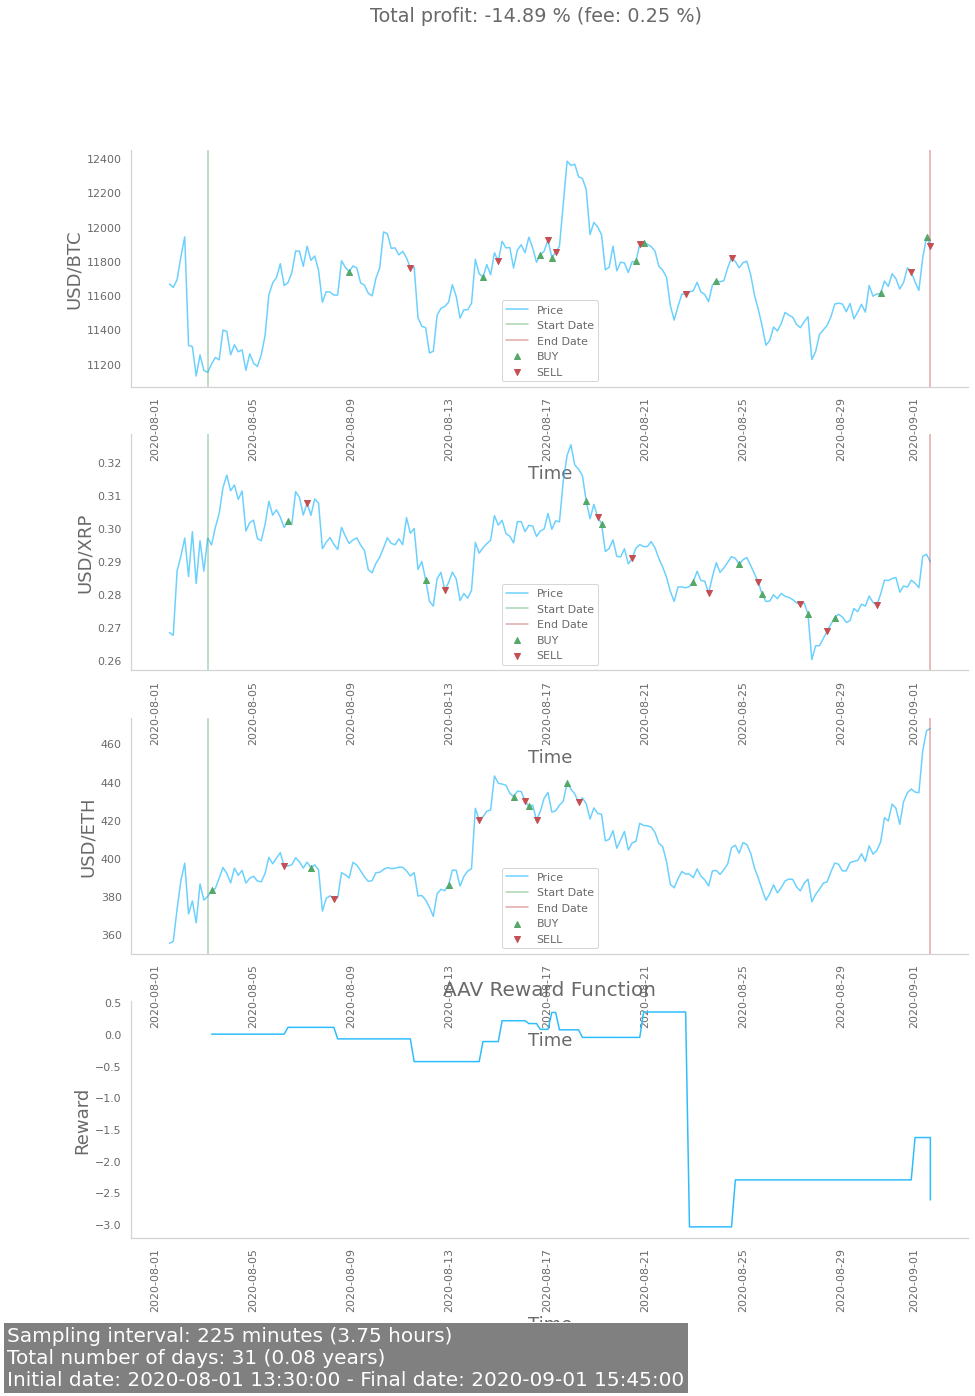

In [5]:
env.render()